<center> <h2> DS 3000 - Summer 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>Predicting COVID-19 Case Count in the United States</h3> </center>
<center><h4>Max Breslauer-Friedman and Luca Demian</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Given the severity of the virus, solving the problems addressed in the problem statement will hopefully tell us more about what could’ve been done ahead of time in anticipation of a pandemic. If we can create a model to accurately  predict  the  severity the COVID-19  pandemic  based  on  prior  factors,  this  could potentially  be extended to forecasting the remainder of the outbreak or predicting other future outbreaks. We haven't found previous work using machine learning in a similar way, likely because a pandemic of this scale hasn't happened since the inception of machine learning.

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
Based on our research about the virus, we came up with the following research questions to answer:

1. How does changing the length of time since the first case appeared in a given county change the accuracy of the predictions from the model?
2. What feature is the most influential in predicting the spread of the virus?
3. Can the case count actually be predicted accurately based on any information, or is this virus too unpredictable?
4. Which features have little to no impact on the spread of the virus? 
5. If our model is accurate, will it be able to forecast the total case counts in the future, rather than just predicting already existing numbers?
6. Based on our data, we think LASSO regression will be the most accurate model, will this be true or will another model be more accurate?

**Hypotheses:**

Hypotheses on features:
- *Null*: All features will have an equal effect on the total number of cases.
- *Alternative*: Population density, population, and population aged over 65 will have the biggest effect on the total number of cases.
- *Alternative*: The commuting data as well as the education and economic data will have the smallest effect on the total number of cases.
- *Alternative*: The population of the county will have the largest effect on the total number of cases.


- *Null*: All features are independent and will unique effects on the prediction.
- *Alternative*: Many of the features will have similar effects on the data as they are correlated (i.e poverty and income, commuting in and commuting out).

Hypotheses about length of time since first case:
- *Null*: The model will vary in accuracy when predicting at different lengths of time since the first case appeared.
- *Alternative*: The accuracy of the model will not fluctuate that much when changing the length of time since the first case appeared in the county. 

    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms in predicting your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a separate script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables included.

We sourced our data from a variety of different datasets, visible in the table below. The code we used to consolidate this data is in our Github Repository [here](https://github.com/lucademian/ds3000_covid_prediction/tree/master/data), where there is a series of Jupyter notebooks prefixed by the order we ran them. The folder also contains the raw data and data midway through compiling into a single table. Our dataset includes 24 variables related to the demographics and preparedness of each county prior to the outbreak, as well as various case counts per county. These variables range from income and poverty data to the number of ICU beds in the county. We decided to focus on variables available before the pandemic started, rather than variables after the disease made an appearance, so that our results could theoretically be extended to forecasting future case counts of COVID-19 or be altered to predict future pandemics.

#### Data Sources

|Data Set|Source|Date|Notebook|Variables|
|-|-|-|-|-|
|NY Times|[Link](https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv)|May 22, 2020|[000_process_nytimes](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/000_process_nytimes.ipynb)|`date_0days`, `cases_0days`, `deaths_0days`, `date_60days`, `cases_60days`, `deaths_60days`, `fips`
|Kaiser Health|[Link](https://khn.org/news/as-coronavirus-spreads-widely-millions-of-older-americans-live-in-counties-with-no-icu-beds/#lookup)|March 30, 2020|[010_process_kaiser](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/010_process_kaiser.ipynb)|`icu_beds`, `kaiser_total_population`, `kaiser_60plus_population`
|US Census Commuting Data|[Link](https://www.census.gov/data/tables/2015/demo/metro-micro/commuting-flows-2015.html)|2015|[020_uscensus_commuting_flows](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/020_uscensus_commuting_flows.ipynb)|`commuting_within`, `commuting_out`, `commuting_in`
|US Census Population Density|[Link](https://api.census.gov/data/2019/pep/population?get=DENSITY,POP&for=county:*)|2019|[030_uscensus_population_density](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/030_uscensus_population_density.ipynb)|`density`, `pop_2019`
|Political Majority|[Link](https://github.com/tonmcg/US_County_Level_Election_Results_08-16/blob/master/2016_US_County_Level_Presidential_Results.csv)|2016|[040_political_majority](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/040_political_majority.ipynb)|`percent_democrat`, `percent_gop`
|Poverty Data|[Link](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)|Feb. 5, 2020|[050_process_poverty](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/050_process_poverty.ipynb)|`percent_in_poverty`
|Age Data|[Link](https://data.census.gov/cedsci/table?q=Older%20Population&hidePreview=true&t=Older%20Population&tid=ACSDP1Y2018.DP05&vintage=2018&g=0100000US.050000)|2018|[060_age_data](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/060_age_data.ipynb)|`pop_under18`, `pop_over65`, `pop_2018`, `median_age`
|Education Data|[Link](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)|2018|[070_education_data](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/070_education_data.ipynb)|`percent_with_bachelors`
|Income Data|[Link](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)|2018|[080_income_data](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/060_income_data.ipynb)|`median_income`

NOTE: we also got the counts from NY Times for other N day values.

### 2.2. Variables
* For your hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?

- **IV**: The features used in prediction.
- **DV**: The most predictive feature(s).


- **IV**: The features used in the prediction.
- **DV**: How the effect of each feature on the predicted data is different or correlated with the effect of others.


- **IV**: The time since the first case appeared in each county.
- **DV**: The prediction accuracy of our model.

Our predictive model will predict the target variable of case count based on a number of different features, listed in the table below.

### 2.3. Data Analysis
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables? Why do you think those are important predictors?
* Describe why this is a supervised ML problem and identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? **Why?**

Our predictive model will predict the case count in each county after X days, where X is the number of days since the first case was identified in the county. We plan to try running our model to predict case count at X=60, X=70, and X=80 days, and compare the perfomance between the three. It will predict case count using a number of feature variables, in the table below:

|Name|Description|
|-|-|
|`icu_beds`|Count of ICU beds per county.
|`commuting_in`|Population commuting into this county every day.
|`commuting_out`|Population commuting out of this county every day.
|`commuting_within`|Population commuting within this county every day.
|`density`|A measure of poulation density in this county.
|`percent_democrat`|Percentage of 2016 voters voting Democratic.
|`percent_in_poverty`|Percentage of county population (all ages) in poverty.
|`pop_under18`|Population in county aged under 18.
|`pop_over65`|Population in county aged 65+.
|`median_age`|Median age for the county.
|`percent_with_bachelors`|Percent of people in county attaining a bachelors degree or higher.
|`median_income`|A measure of the median income in this county.
|`pop_2019`|County population as of 2019.

We chose these predictors based on [CDC guidance](https://www.cdc.gov/coronavirus/2019-ncov/covid-data/investigations-discovery/assessing-risk-factors.html) about risk factors for the infection on top of our own judgements about what factors could potentially lead to a worsened outbreak in a county. We hypothesize that population density, population, ICU beds, median income, and population aged 65+ will be the most important variables in our predictive model.

This is a supervised machine learning problem because we are using a subset of our data to train the model, where it will have access to the number of cases, the variable to predict, in order to learn. This is a regression problem, because we are predicting the case count, a continuous variable.

We are going to use the LASSO, Ridge, Support Vector Machine, k-Nearest Neighbor, and Gaussian Naive Bayes regression algorithms because this is a regression problem and we want to test a variety of different models. We think LASSO regression will make most accurate predictions because we have more control over the tuning of the model and it will automatically select the most important features.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features

We performed data cleaning, extraction, and wrangling as part of our data acquisition, because our data is coming from so many distinct sources. This selection process can be seen in our [notebook on Github](https://github.com/lucademian/ds3000_covid_prediction/blob/master/data/999_feature_selection.ipynb), and the final data with the features and target variable is selected below.

In [4]:
import pandas as pd
import requests

DATA_URL = "https://raw.githubusercontent.com/lucademian/ds3000_covid_prediction/master/data/999_selected_features_60-70-80days.csv?token=ADDEA5VGC2CO7OOZREVREFK65ZXY4"
df = pd.read_csv(DATA_URL, index_col=0)
df.head()

,icu_beds,commuting_in,commuting_out,commuting_within,density,percent_democrat,percent_in_poverty,pop_under18,pop_over65,median_age,percent_with_bachelors,median_income,pop_2019,cases_60days,cases_70days,cases_80days
0,72,54070,130657,233454,393.996419,0.542634,7.5,180294,99868,37.8,31.9,87096,822083,446.0,1228.0,1801.0
3,1606,489235,317505,2095418,5450.384359,0.743758,13.8,1160425,724730,36.6,38.0,63347,5150233,1194.0,6473.0,15474.0
6,651,317959,235247,1242712,4005.616646,0.509602,10.5,711188,440488,37.8,39.9,89373,3175692,187.0,786.0,1299.0
9,1004,79525,40810,1752902,487.509549,0.456797,12.3,1042245,615277,36.1,32.0,65234,4485414,299.0,1326.0,2146.0
12,2126,483659,334665,4182123,2473.507350,0.714072,14.2,2246521,1299277,36.2,31.8,67986,10039107,1216.0,5940.0,10496.0


First, we separated our features from the targets. We have 3 different target columns, for each of the different N-day values we will look at. We decided to use the Min-Max Scaler to process our data, because the scales for our data are so different.

In [0]:
from sklearn.preprocessing import MinMaxScaler

def get_features_target(n_days, scale=True):
    """
    This function takes in a N-day value and returns the features and target
    for that value as a tuple: (features, target). The features are scaled using
    the Min-Max scaler.
    """

    target_column = f"cases_{n_days}days"
    
    # our first 13 columns are features, and the 
    # last N columns are the different targets.
    features = df.loc[df[target_column].notna()].iloc[:, 0:13]
    target = df[target_column].dropna()

    if not scale:
        return features, target
    
    # create a scaler object and fit to the features
    scaler = MinMaxScaler()
    scaler.fit(features)

    # transform the features using the scaler
    features_scaled = scaler.transform(features)
    
    return features_scaled, target

Then, we performed feature selection using the SelectKBest algorithm based on F-value
for each feature.

In [0]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

def k_best_features(k, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
  
    selector = SelectKBest(f_classif, k = k)
    selector.fit(X_train, y_train)
  
    columns = []
    for i in range(len(selector.get_support())):
      if selector.get_support()[i]:
        columns.append(df.columns[i])

    return columns      

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook)


For our first visualization, we decided to see if a visualization could help support our hypothesis. In one hypothesis we predicted that a few of the features would have similar effects on the target variable as the data between them was directly correlated. We first visualized the percent of the population in poverty and the median income. As you can see, there is a distinct curve correlation the two variables. We also visualized the data for the number of people commuting into the county versus the number of people commuting out of the county each day. FILL IN INTERPRETATION ONCE DATA IS RETRIEVED.

/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:696: RuntimeWarning: invalid value encountered in less_equal
  locs = locs[(vmin <= locs) & (locs <= vmax)]
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:744: RuntimeWarning: invalid value encountered in less_equal
  locs = locs[(vmin <= locs) & (locs <= vmax)]


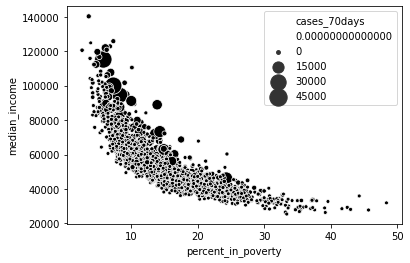

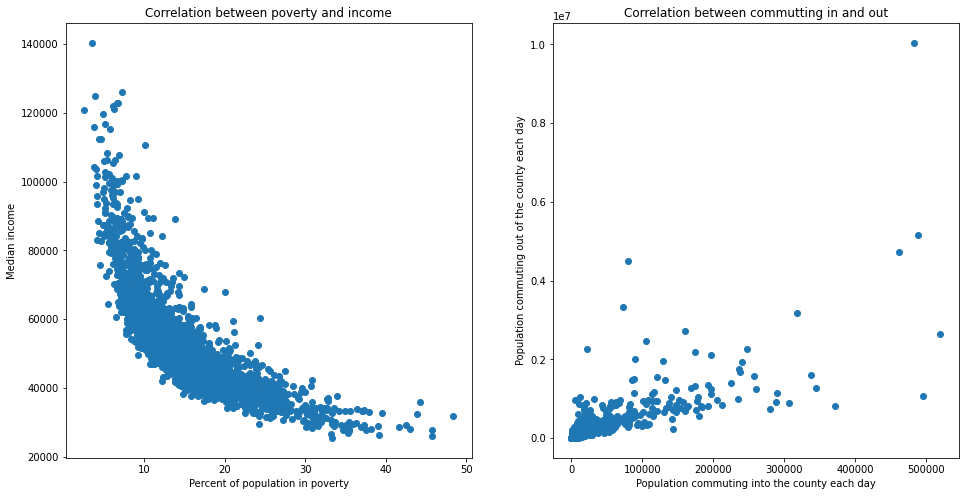

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot

avg_cases = sum(df["cases_70days"])/len(df["cases_70days"])
sns.scatterplot(data = df, x = 'percent_in_poverty', y = 'median_income', hue = 'cases_70days', 
                size = 'cases_70days', sizes = (15, 300), hue_norm = (0, avg_cases))

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.scatter(x=df['percent_in_poverty'], y=df['median_income'])
plt.xlabel("Percent of population in poverty")
plt.ylabel("Median income")
plt.title("Correlation between poverty and income")

plt.subplot(1,2,2)
plt.scatter(x=df['commuting_in'], y=df['pop_2019'])
plt.xlabel("Population commuting into the county each day")
plt.ylabel("Population commuting out of the county each day")
plt.title("Correlation between commutting in and out")

plt.show()

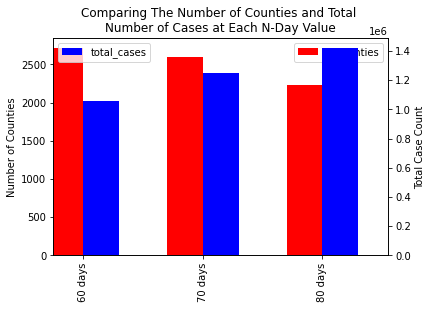

In [52]:
import numpy as np
day_counts = (60, 70, 80)

df_rows = [{
  "n_counties": len(get_features_target(N, scale=False)[0]),
  "total_cases": get_features_target(N, scale=False)[1].sum()
} for N in day_counts]

bar_df = pd.DataFrame(df_rows, index=day_counts)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

bar_df.n_counties.plot(kind='bar', color='red', ax=ax, width=width, position=1)
bar_df.total_cases.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Counties')
ax2.set_ylabel('Total Case Count')

# Create names on the x-axis
plt.xticks(y_pos, [f"{N} days" for N in day_counts])

plt.title("Comparing The Number of Counties and Total \nNumber of Cases at Each N-Day Value")

ax.legend(loc=1)
ax2.legend(loc=0)

# Show graphic
plt.show()

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

### 3.6. Model Testing
* Test your tuned algorithms using your testing set

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we you the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. An survey will be shared after the deadline for this deliverable.